In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("text_classification_train.csv")

In [3]:
df1 = df.copy()

In [4]:
df1

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [6]:
df1.columns = map(lambda x : x.lower(), df1.columns)

In [8]:
df1.drop('id', axis = 1, inplace = True)

In [9]:
df1

,comment,topic
0,A few things. You might have negative- frequen...,Biology
1,Is it so hard to believe that there exist part...,Physics
2,There are bees,Biology
3,I'm a medication technician. And that's alot o...,Biology
4,Cesium is such a pretty metal.,Chemistry
...,...,...
8690,I make similar observations over the last week...,Biology
8691,You would know.,Biology
8692,Also use the correct number of sig figs,Chemistry
8693,"What about the ethical delimmas, groundbreaki...",Biology


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  8695 non-null   object
 1   topic    8695 non-null   object
dtypes: object(2)
memory usage: 136.0+ KB


<Axes: >

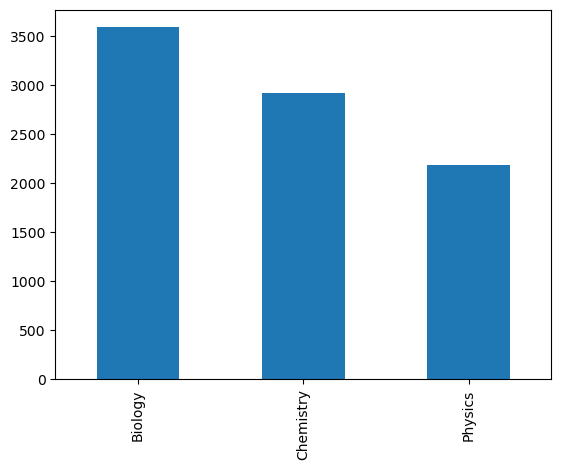

In [91]:
df1['topic'].value_counts().plot(kind = 'bar')

#### Text processing
Text processing contains two main phases, which are tokenization and normalization .

Tokenization is the process of splitting a longer string of text into smaller pieces, or tokens.

Normalization referring to convert number to their word equivalent, remove punctuation, convert all text to the same case, remove stopwords, remove noise, lemmatizing and stemming.

**Stemming** — removing affixes (suffixed, prefixes, infixes, circumfixes), For example, running to run

**Lemmatization** — capture canonical form based on a word’s lemma. For example, better to good

Tokenization

Using tokenizer to separate the sentences into a list of single words (tokens)

In [16]:
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize

In [17]:
words = df1['comment']

In [18]:
token = WordPunctTokenizer()

In [20]:
words[0]

'A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food.  So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey. This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed. This cycle continues perpetually. \\n\\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness. \\n\\nMore likely on a *year to year* basis, the population is experiencing fluctuating selection where a

In [22]:
first_statement_token = token.tokenize(words[0])

In [24]:
print(first_statement_token)

['A', 'few', 'things', '.', 'You', 'might', 'have', 'negative', '-', 'frequency', 'dependent', 'selection', 'going', 'on', 'where', 'the', 'least', 'common', 'phenotype', ',', 'reflected', 'by', 'genotype', ',', 'is', 'going', 'to', 'have', 'an', 'advantage', 'in', 'the', 'environment', '.', 'For', 'instance', ',', 'if', 'a', 'prey', 'animal', 'such', 'as', 'a', 'vole', 'were', 'to', 'have', 'a', 'light', 'and', 'a', 'dark', 'phenotype', ',', 'a', 'predator', 'might', 'recognize', 'the', 'more', 'common', 'phenotype', 'as', 'food', '.', 'So', 'if', 'the', 'light', 'voles', 'are', 'more', 'common', ',', 'foxes', 'may', 'be', 'keeping', 'a', 'closer', 'eye', 'out', 'for', 'light', 'phenotypic', 'voles', ',', 'recognising', 'them', 'as', 'good', 'prey', '.', 'This', 'would', 'reduce', 'the', 'light', 'causing', 'alleles', 'due', 'to', 'increased', 'predation', 'and', 'the', 'dark', 'genotypes', 'would', 'increase', 'their', 'proportion', 'of', 'the', 'population', 'until', 'this', 'scenar

#### Normalization


**Removing Stopwords**


Stopwords referring to the word which does not carry much insight, such as preposition

In [25]:
from nltk.corpus import stopwords

In [26]:
stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
[x for x in first_statement_token  if x not in stop_words]

['A',
 'things',
 '.',
 'You',
 'might',
 'negative',
 '-',
 'frequency',
 'dependent',
 'selection',
 'going',
 'least',
 'common',
 'phenotype',
 ',',
 'reflected',
 'genotype',
 ',',
 'going',
 'advantage',
 'environment',
 '.',
 'For',
 'instance',
 ',',
 'prey',
 'animal',
 'vole',
 'light',
 'dark',
 'phenotype',
 ',',
 'predator',
 'might',
 'recognize',
 'common',
 'phenotype',
 'food',
 '.',
 'So',
 'light',
 'voles',
 'common',
 ',',
 'foxes',
 'may',
 'keeping',
 'closer',
 'eye',
 'light',
 'phenotypic',
 'voles',
 ',',
 'recognising',
 'good',
 'prey',
 '.',
 'This',
 'would',
 'reduce',
 'light',
 'causing',
 'alleles',
 'due',
 'increased',
 'predation',
 'dark',
 'genotypes',
 'would',
 'increase',
 'proportion',
 'population',
 'scenario',
 'reversed',
 '.',
 'This',
 'cycle',
 'continues',
 'perpetually',
 '.',
 '\\',
 'n',
 '\\',
 'nHowever',
 ',',
 'unlikely',
 'strictly',
 'yearly',
 'usually',
 'takes',
 'time',
 'year',
 'entire',
 'populations',
 'allele',
 'fre

In [29]:
for x in first_statement_token:
    print(x)
    if x not in stop_words:
        print(x)

A
A
few
things
things
.
.
You
You
might
might
have
negative
negative
-
-
frequency
frequency
dependent
dependent
selection
selection
going
going
on
where
the
least
least
common
common
phenotype
phenotype
,
,
reflected
reflected
by
genotype
genotype
,
,
is
going
going
to
have
an
advantage
advantage
in
the
environment
environment
.
.
For
For
instance
instance
,
,
if
a
prey
prey
animal
animal
such
as
a
vole
vole
were
to
have
a
light
light
and
a
dark
dark
phenotype
phenotype
,
,
a
predator
predator
might
might
recognize
recognize
the
more
common
common
phenotype
phenotype
as
food
food
.
.
So
So
if
the
light
light
voles
voles
are
more
common
common
,
,
foxes
foxes
may
may
be
keeping
keeping
a
closer
closer
eye
eye
out
for
light
light
phenotypic
phenotypic
voles
voles
,
,
recognising
recognising
them
as
good
good
prey
prey
.
.
This
This
would
would
reduce
reduce
the
light
light
causing
causing
alleles
alleles
due
due
to
increased
increased
predation
predation
and
the
dark
dark
genotypes
geno

In [30]:
first_statement_t_s = [x for x in first_statement_token  if x not in stop_words]
print(first_statement_t_s)

['A', 'things', '.', 'You', 'might', 'negative', '-', 'frequency', 'dependent', 'selection', 'going', 'least', 'common', 'phenotype', ',', 'reflected', 'genotype', ',', 'going', 'advantage', 'environment', '.', 'For', 'instance', ',', 'prey', 'animal', 'vole', 'light', 'dark', 'phenotype', ',', 'predator', 'might', 'recognize', 'common', 'phenotype', 'food', '.', 'So', 'light', 'voles', 'common', ',', 'foxes', 'may', 'keeping', 'closer', 'eye', 'light', 'phenotypic', 'voles', ',', 'recognising', 'good', 'prey', '.', 'This', 'would', 'reduce', 'light', 'causing', 'alleles', 'due', 'increased', 'predation', 'dark', 'genotypes', 'would', 'increase', 'proportion', 'population', 'scenario', 'reversed', '.', 'This', 'cycle', 'continues', 'perpetually', '.', '\\', 'n', '\\', 'nHowever', ',', 'unlikely', 'strictly', 'yearly', 'usually', 'takes', 'time', 'year', 'entire', 'populations', 'allele', 'frequencies', 'change', 'enough', 'make', 'large', 'enough', 'difference', 'alter', 'fitness', '.'

**Lemmatization & stemming**

Lemmatizing and stemming both help to reduce the dimension of the vocabulary by return the words to their root form (lemmatizing) or remove all the suffix, affix, prefix and so on (stemming). Stemming is nice for reducing the dimension of vocabulary, but most of the time the word become meaningless as stemming only chopped off the suffix but not returning the words to their base form.

In [31]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Deepak.koli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [38]:
print(first_statement_t_s)

['A', 'things', '.', 'You', 'might', 'negative', '-', 'frequency', 'dependent', 'selection', 'going', 'least', 'common', 'phenotype', ',', 'reflected', 'genotype', ',', 'going', 'advantage', 'environment', '.', 'For', 'instance', ',', 'prey', 'animal', 'vole', 'light', 'dark', 'phenotype', ',', 'predator', 'might', 'recognize', 'common', 'phenotype', 'food', '.', 'So', 'light', 'voles', 'common', ',', 'foxes', 'may', 'keeping', 'closer', 'eye', 'light', 'phenotypic', 'voles', ',', 'recognising', 'good', 'prey', '.', 'This', 'would', 'reduce', 'light', 'causing', 'alleles', 'due', 'increased', 'predation', 'dark', 'genotypes', 'would', 'increase', 'proportion', 'population', 'scenario', 'reversed', '.', 'This', 'cycle', 'continues', 'perpetually', '.', '\\', 'n', '\\', 'nHowever', ',', 'unlikely', 'strictly', 'yearly', 'usually', 'takes', 'time', 'year', 'entire', 'populations', 'allele', 'frequencies', 'change', 'enough', 'make', 'large', 'enough', 'difference', 'alter', 'fitness', '.'

In [44]:
first_statement_t_s[10]

'going'

In [45]:
lem.lemmatize(first_statement_t_s[10])

'going'

In [46]:
lem.lemmatize("doing")

'doing'

In [ ]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem.lemmatize("doing")

In [47]:

lem = WordNetLemmatizer()
lemmatized_word = lem.lemmatize("doing")

print(lemmatized_word)


doing


In [49]:
import string
punct = string.punctuation

In [50]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
new_tokens = [x for x in first_statement_t_s if x not in punct]  
print(new_tokens)

['A', 'things', 'You', 'might', 'negative', 'frequency', 'dependent', 'selection', 'going', 'least', 'common', 'phenotype', 'reflected', 'genotype', 'going', 'advantage', 'environment', 'For', 'instance', 'prey', 'animal', 'vole', 'light', 'dark', 'phenotype', 'predator', 'might', 'recognize', 'common', 'phenotype', 'food', 'So', 'light', 'voles', 'common', 'foxes', 'may', 'keeping', 'closer', 'eye', 'light', 'phenotypic', 'voles', 'recognising', 'good', 'prey', 'This', 'would', 'reduce', 'light', 'causing', 'alleles', 'due', 'increased', 'predation', 'dark', 'genotypes', 'would', 'increase', 'proportion', 'population', 'scenario', 'reversed', 'This', 'cycle', 'continues', 'perpetually', 'n', 'nHowever', 'unlikely', 'strictly', 'yearly', 'usually', 'takes', 'time', 'year', 'entire', 'populations', 'allele', 'frequencies', 'change', 'enough', 'make', 'large', 'enough', 'difference', 'alter', 'fitness', 'n', 'nMore', 'likely', 'year', 'year', 'basis', 'population', 'experiencing', 'fluct

#### Text representation

Feature Extraction is a general term that is also known as a text representation of text vectorization which is a process of converting text into numbers. we call vectorization because when text is converted in numbers it is in vector form.

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [56]:
y = df1['topic']

In [57]:
y = le.fit_transform(y)

print(y)

[0 2 0 ... 1 0 0]


**Bag Of Words**

Bag of words is a little bit similar to one-hot encoding where we enter each word as a binary value and in a Bag of words we keep a single row and entry the count of words in a document.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(df1['comment'])

In [61]:
bow

<8695x18177 sparse matrix of type '<class 'numpy.int64'>'
	with 190076 stored elements in Compressed Sparse Row format>

In [63]:
bow.shape

(8695, 18177)

In [64]:
vectorizer = CountVectorizer(max_features=4000)
bow = vectorizer.fit_transform(df1['comment']).toarray()
features = vectorizer.get_feature_names_out()
bow = pd.DataFrame(bow, columns=features)
bow

,000,019,02,10,100,1000,10th,11,12,13,...,young,younger,your,yourself,youtu,youtube,yt,yup,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**N-Grams**

The technique is similar to Bag of words. All the techniques till now we have read it is made up of a single word and we are not able to use them or utilize them for better understanding. So N-Gram technique solves this problem and constructs vocabulary with multiple words.



In [66]:
#Bigram model
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(ngram_range=(2,2))
bigram = CV.fit_transform(df1['comment'])
bigram

<8695x121785 sparse matrix of type '<class 'numpy.int64'>'
	with 228017 stored elements in Compressed Sparse Row format>

In [68]:
vectorizer = CountVectorizer(ngram_range=(2,2))
bigram = vectorizer.fit_transform(df1['comment']).toarray()
features = vectorizer.get_feature_names_out()
df_bigram = pd.DataFrame(bigram, columns=features)

In [69]:
df_bigram

,000 000,000 americans,000 billion,000 btu,000 eggs,000 times,000 without,000 would,000 years,00000000000000000000000332 grams,...,µg scale,µg scales,área so,árvore como,æther or,μg in,μg nnewspapers,μm or,μμ and,الله اکبر
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF (Term Frequency and Inverse Document Frequency)**

Now the technique which we will study does not work in the same way as the above techniques. This technique gives different values(weightage) to each word in a document. The core idea of assigning weightage is the word that appears multiple time in a document but has a rare appearance in corpus then it is very important for that document so it gives more weightage to that word. This weightage is calculated by two terms known as TF and IDF.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_result=tfidf.fit_transform(df1['comment']).toarray()

In [71]:
tfidf_result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
tf_vectorizer = TfidfVectorizer(max_features=6000)
tfidf_result = tf_vectorizer.fit_transform(df1['comment']).toarray()
features = tf_vectorizer.get_feature_names_out()
tfidf_result = pd.DataFrame(tfidf_result, columns=features)

In [73]:
tfidf_result

,000,01,019,02,020,021,03,04,07,09,...,yours,yourself,youtu,youtube,yt,yup,zeolites,zero,zinc,zp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
tf_result_array = tf_result.toarray()
tf_result_array = tf_result.toarray()

NameError: name 'tf_result' is not defined

In [74]:

# Find the indices of the top 10 TF-IDF values in the training set
top_indices_train = np.argsort(tfidf_result_array.max(axis=0))[-10:]

# Get the corresponding terms from the feature names
top_terms_train = [feature_names[i] for i in top_indices_train]

# Print the top 10 terms and their corresponding TF-IDF values
for term, tfidf_value in zip(top_terms_train, tf_result_array.max(axis=0)[top_indices_train]):
    print(f"{term}: {tfidf_value}")


NameError: name 'tfidf_result_array' is not defined

In [78]:
a = vectorizer.fit_transform(df1['comment'])
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrices to dense arrays for better readability
a_array = a.toarray()
a_array = a.toarray()

# Print the terms and their corresponding TF-IDF values for a specific document (e.g., first document)
for term, tfidf_value in zip(feature_names, a_array[0]):
    print(f"{term}: {tfidf_value}")

    

000 000: 0
000 americans: 0
000 billion: 0
000 btu: 0
000 eggs: 0
000 times: 0
000 without: 0
000 would: 0
000 years: 0
00000000000000000000000332 grams: 0
00004 is: 0
000705 1000: 0
000705 pa: 0
000btu of: 0
000g on: 0
000x68 34: 0
001 is: 0
00129 nsince: 0
002 circuits: 0
005 093cm: 0
005 based: 0
005 minutes: 0
01 jpg: 0
01 re: 0
01 ul: 0
0110509 nessentially: 0
012 faster: 0
0123v1 pdf: 0
01350 narxiv: 0
019 0450: 0
019 0483: 0
019 10003: 0
01pm on: 0
02 02: 0
02 10: 0
02 21: 0
02 25: 0
02 am: 0
02 chance: 0
02 creating: 0
02 pm: 0
02 so: 0
02 spiders: 0
02 took: 0
02 μg: 0
020 00129: 0
020 0408: 0
020008 022: 0
02008 mol: 0
020e23 021e23: 0
021 01350: 0
021 24933: 0
021 82134: 0
021e23 wait: 0
022 10: 0
025 100: 0
0277 mol: 0
02e23molecules mol: 0
02x10 23: 0
03 02: 0
03 21: 0
03 avogadro: 0
037026938390638x via: 0
0392v1 pdf: 0
03mol 02e23molecules: 0
04 2021: 0
04 birth: 0
04 jpg: 0
04029 one: 0
0408 some: 0
0408 the: 0
0450 can: 0
0450 https: 0
0483 https: 0
0483 nhttps: 0
0596

In [79]:
import numpy as np

# Find the indices of the top 10 TF-IDF values in the training set
top_indices_train = np.argsort(a_array.max(axis=0))[-10:]

# Get the corresponding terms from the feature names
top_terms_train = [feature_names[i] for i in top_indices_train]

# Print the top 10 terms and their corresponding TF-IDF values
for term, tfidf_value in zip(top_terms_train, a_array.max(axis=0)[top_indices_train]):
    print(f"{term}: {tfidf_value}")


away first: 10
observer sees: 11
dark matter: 11
joints between: 15
between the: 15
the plate: 16
bullet is: 21
is ls: 28
ls away: 28
alan alan: 143


**Modelling : Naive Bayes**

Naive Bayes is a powerful tool that leverages Bayes’ Theorem to understand and mimic complex data structures. In recent years, it has commonly been used for Natural Language Processing (NLP) tasks, such as text categorization.



In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(tfidf_result, y, test_size=0.2)
nb.fit(xtrain, ytrain)

MultinomialNB()

In [86]:
ypred = nb.predict(xtrain)
ypred = nb.predict(xtest)

In [87]:
ypred.shape

(1739,)

In [88]:
ytrain.shape

(6956,)

In [89]:
ytrain=ytrain[0:1739]
ytest=ytest[0:1739]

In [90]:
print("Training Results:\n")
print(classification_report(ytrain, ypred))
print("\nTesting Results:\n")
print(classification_report(ytest, ypred))

Training Results:

              precision    recall  f1-score   support

           0       0.44      0.58      0.50       742
           1       0.35      0.32      0.34       555
           2       0.26      0.15      0.19       442

    accuracy                           0.39      1739
   macro avg       0.35      0.35      0.34      1739
weighted avg       0.37      0.39      0.37      1739


Testing Results:

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       731
           1       0.70      0.63      0.66       558
           2       0.86      0.49      0.62       450

    accuracy                           0.70      1739
   macro avg       0.74      0.67      0.68      1739
weighted avg       0.72      0.70      0.69      1739

